In [1]:
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
import shutil
import os

In [2]:
# combine pieces with working database

path = r"./data/raw/pieces" # use your path
all_files = glob.glob(path + "/*.csv")

df_working = pd.read_csv(r'./data/raw\\lor_ranked_data_all.csv')
li = [df_working]

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)
frame = frame.loc[:, 'match_id':] #delete all the columns before

In [3]:
print(f'the old file is shaped {df_working.shape} and the new file is shaped {frame.shape}. You\'re adding {frame.shape[0] - df_working.shape[0]} entries')

the old file is shaped (742856, 14) and the new file is shaped (878250, 13). You're adding 135394 entries


In [4]:
len(frame)

878250

In [5]:
frame = frame.drop_duplicates()

<AxesSubplot:>

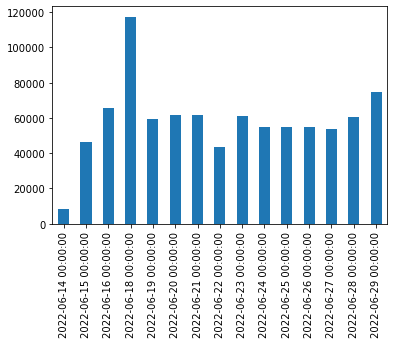

In [6]:
#check if you've missed any dates

thing = pd.to_datetime(frame['game_start_time_utc'].str[:10]) # just get the dates
dates = thing.value_counts() # how many games are played per day?
dates.sort_index(ascending=True, inplace=True) # sort the dates

fig, ax = plt.subplots() # graph to see if you're missing any dates
dates.plot(ax=ax, kind='bar')

In [7]:
### ONLY RUN IF THE PREVIOUS GRAPH LOOKS GOOD
confirm = input('If you want to update the csv files and move a bunch of stuff, type "yes"')
if confirm == 'yes':
    frame.to_csv('./data/raw/lor_ranked_data_all.csv')
    
    source_dir = r'./data/raw/pieces'
    target_dir = r'./data/raw/pieces/processed'

    file_names = os.listdir(source_dir)

    for file_name in file_names:
        shutil.move(os.path.join(source_dir, file_name), target_dir)
else:
    print("understandable, have a nice day.")
    

If you want to update the csv files and move a bunch of stuff, type "yes" yes
